## Red Wine Quality Prediction
#### Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
#### Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
#### Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report 
import joblib

import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
# Load Dataset to a Pandas DataFrame 
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 2\winequality-red.csv")
# Print sample rows of the dataset
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
343,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
1059,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
829,5.9,0.610,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6
259,10.0,0.310,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7


First 5 sample variables of the dataset

In [3]:
# see the number of rows and columns in the tataset
df.shape

(1599, 12)

In [4]:
# Let's check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here we can see that all the columns except 'quality' is continuous

'quality' is discrete type variable which we have to predict

In [5]:
# Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values are found

### Data Analysis and Visualisation

In [6]:
# Statistical measure of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This describe() function gives us a statistical measure of the data set which includes 
1. count
2. mean
3. std
4. min
5. 25%
6. 50%
7. 75%
8. max

### Drop Duplicates if any

In [7]:
df.drop_duplicates(subset=None, keep= 'first', ignore_index=True, inplace = True)

In [8]:
df.shape

(1359, 12)

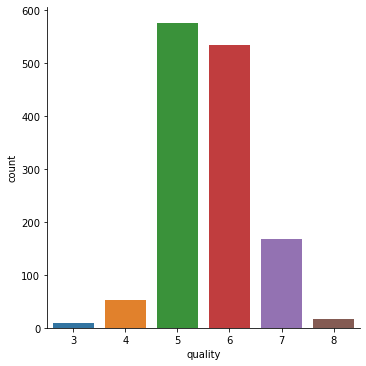

In [9]:
# Number of values of each quality
sns.catplot(x='quality', data=df, kind='count')
plt.show()

From the catplot we found the numbers of wine of different quality

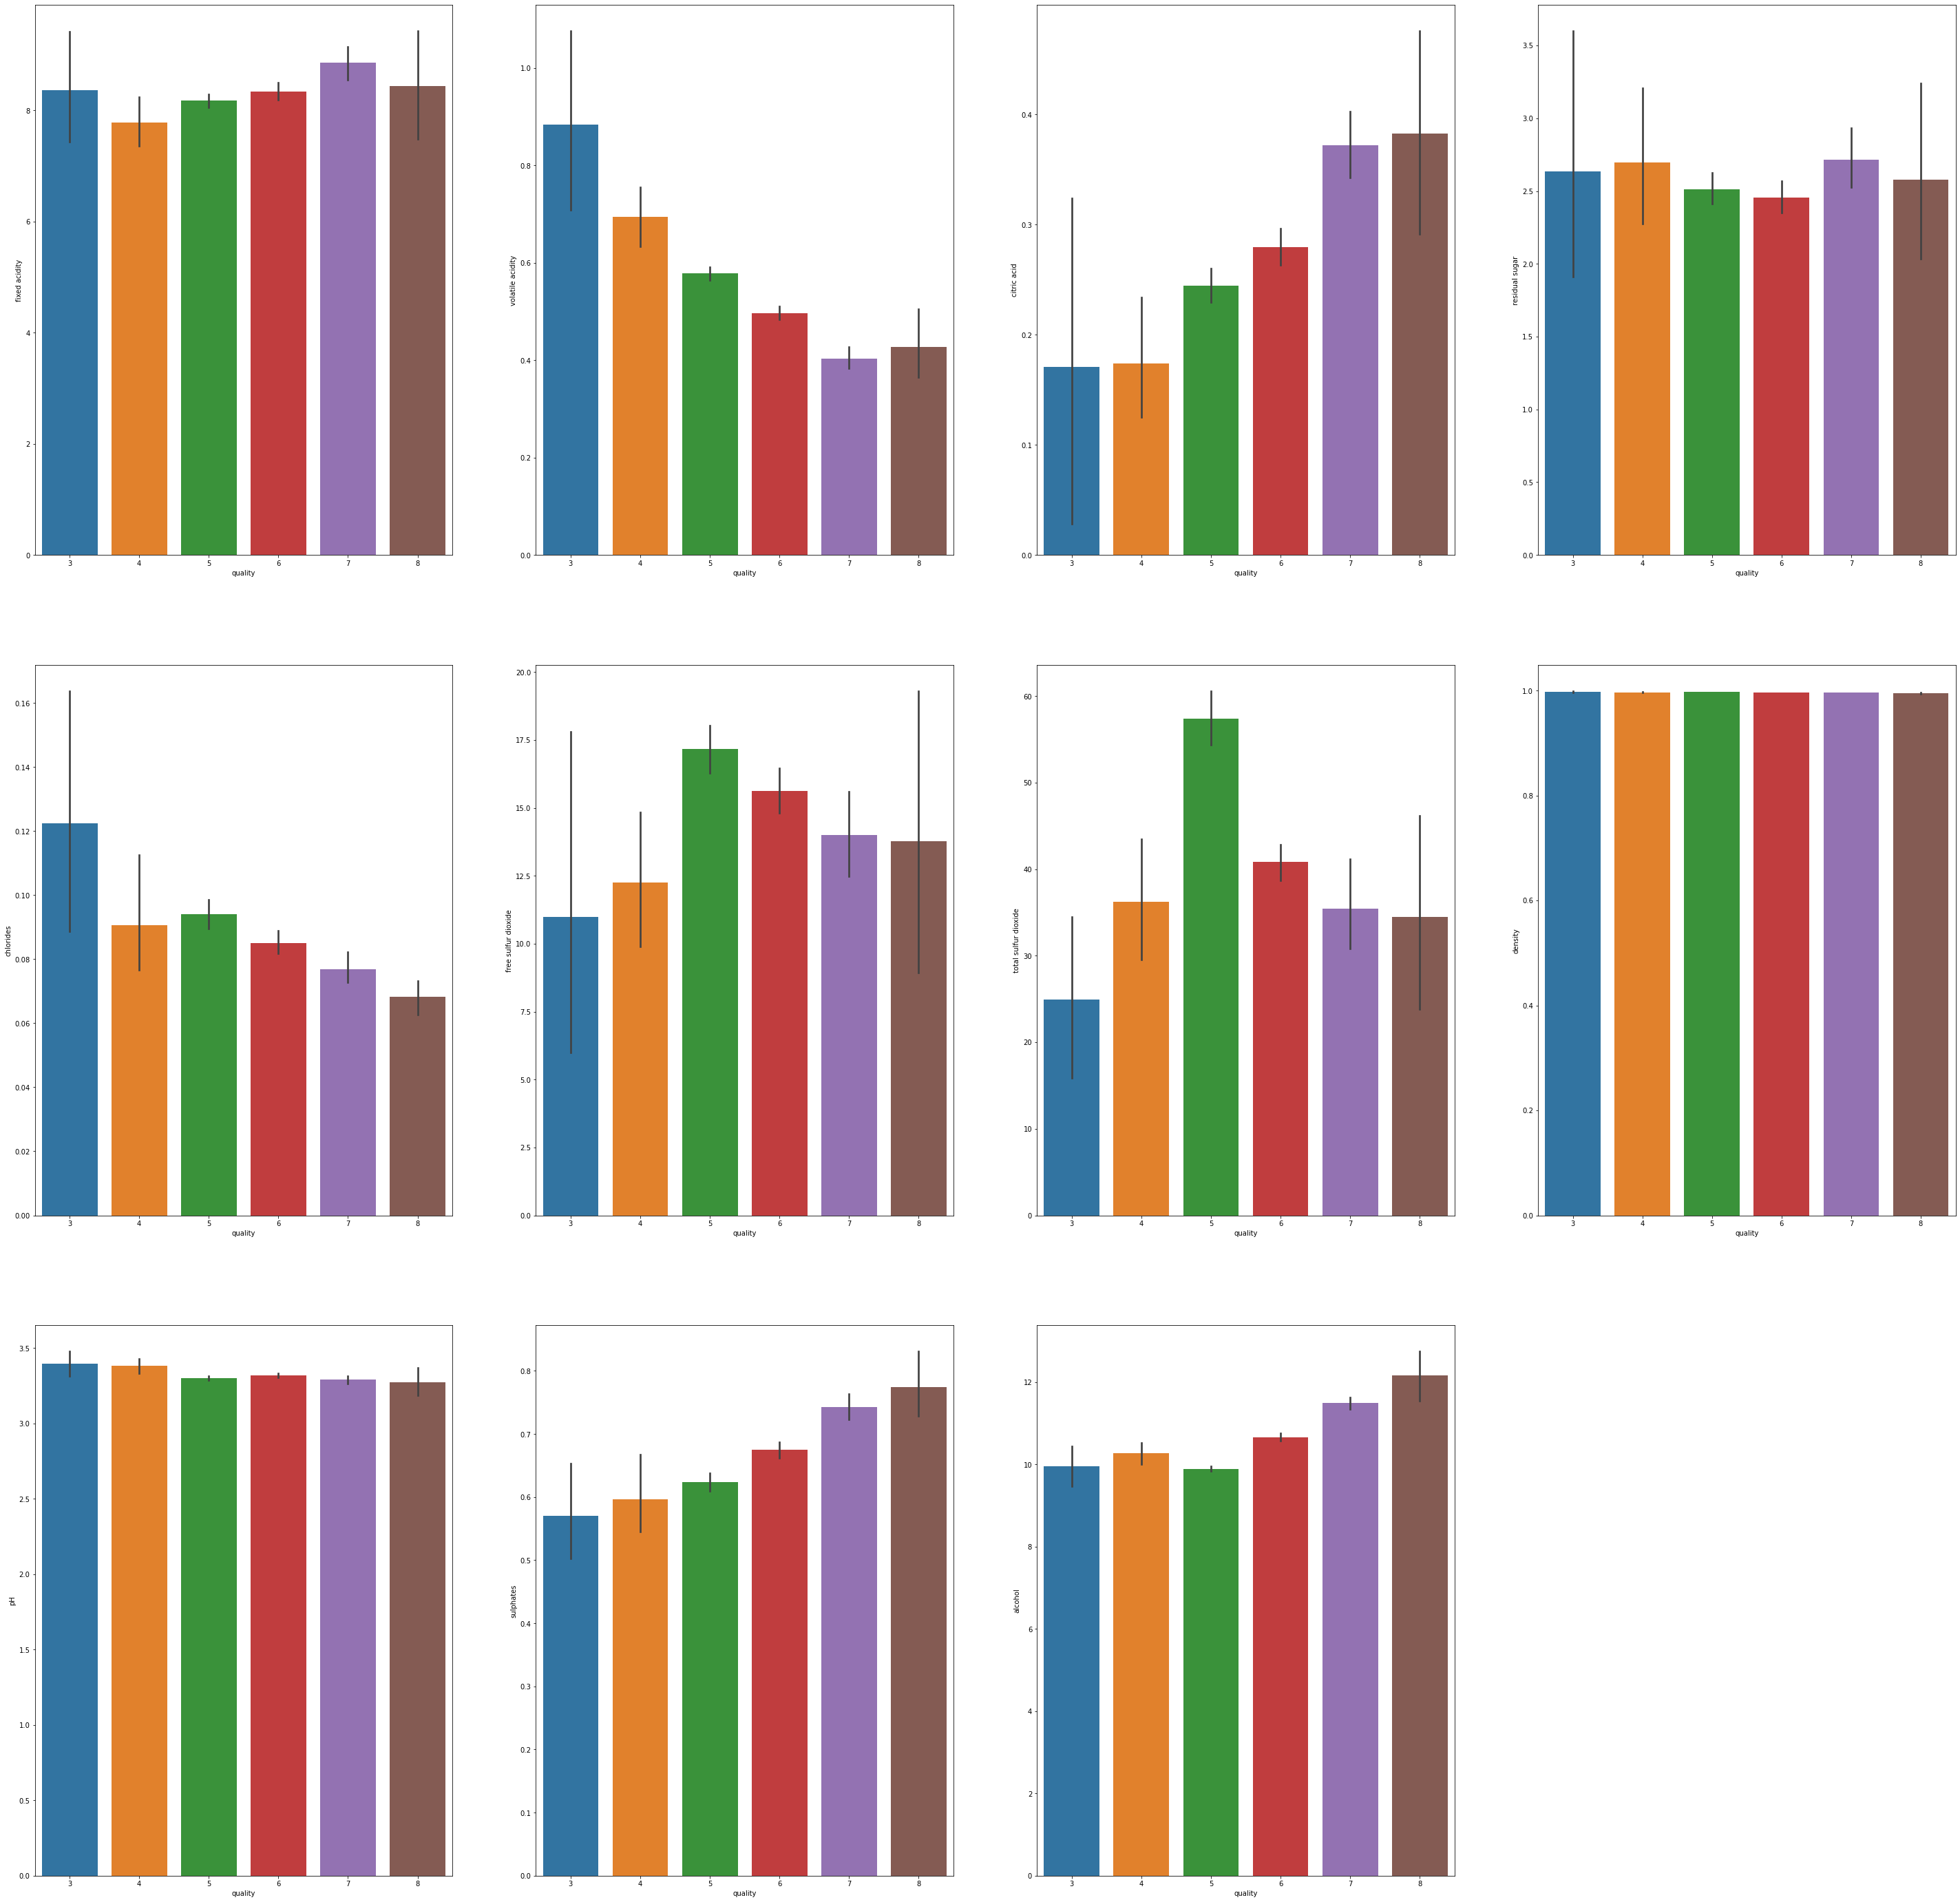

In [10]:
plt.figure(figsize=(50,50))

plt.subplot(3,4,1)
# fixed acidity vs quality
sns.barplot(x='quality', y='fixed acidity', data=df)

plt.subplot(3,4,2)
# volatile acidity vs quality
sns.barplot(x='quality', y='volatile acidity', data=df)

plt.subplot(3,4,3)
# citric acid vs quality
sns.barplot(x='quality', y='citric acid', data=df)

plt.subplot(3,4,4)
# residual sugar vs quality
sns.barplot(x='quality', y='residual sugar', data=df)

plt.subplot(3,4,5)
# chlorides vs quality
sns.barplot(x='quality', y='chlorides', data=df)

plt.subplot(3,4,6)
# free sulfur dioxide vs quality
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

plt.subplot(3,4,7)
# total sulfur dioxide vs quality
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

plt.subplot(3,4,8)
# density vs quality
sns.barplot(x='quality', y='density', data=df)

plt.subplot(3,4,9)
# pH vs quality
sns.barplot(x='quality', y='pH', data=df)

plt.subplot(3,4,10)
# sulphates vs quality
sns.barplot(x='quality', y='sulphates', data=df)

plt.subplot(3,4,11)
# alcohol vs quality
sns.barplot(x='quality', y='alcohol', data=df)

plt.show()

The subplots the relation between "quality" with other columns

# Correlation

In [11]:
correlation = df.corr()

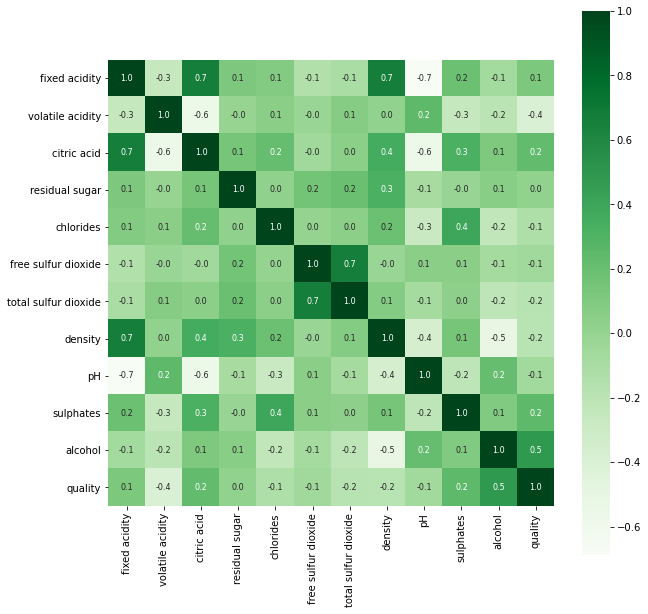

In [12]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')
plt.show()

The figure shows the correlation between the columns
and have both positive and negetive correlation

## Data Preprocessing

In [13]:
# Seperate the data and label
X = df.drop('quality', axis=1)

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


## Label Encoding

In [15]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [16]:
Y.sample(5)

519    0
801    0
188    0
67     0
605    0
Name: quality, dtype: int64

In [17]:
# Value counts
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [18]:
## Train & Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [19]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1359,) (1087,) (272,)


## Model Training: 

#### Decision Tree Classifier

In [20]:
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

### Model Evaluation for Decision Tree Classifier

In [22]:
# Predict Method
Y_pred = dtc.predict(X_test)

In [23]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       240
           1       0.43      0.41      0.42        32

    accuracy                           0.87       272
   macro avg       0.68      0.67      0.67       272
weighted avg       0.86      0.87      0.87       272



##### Using Random Forest Classifier

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation for Random Forest Classifier

In [26]:
# Accuracy on test data
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)
print(classification_report(Y_test, X_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       240
           1       0.59      0.41      0.48        32

    accuracy                           0.90       272
   macro avg       0.76      0.68      0.71       272
weighted avg       0.88      0.90      0.89       272



In [27]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.8970588235294118


### Cross Validation Score

In [28]:
# Now lets try to do some evaluation for decision tree model using cross validation.
dtc_val = cross_val_score(estimator = dtc, X = X_train, y = Y_train, cv = 7)
dtc_val.mean()

0.8491019732955217

In [29]:
# Now lets try to do some evaluation for random forest model using cross validation.
model_val = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 7)
model_val.mean()

0.8721079995273543

## ROC AUC Curve

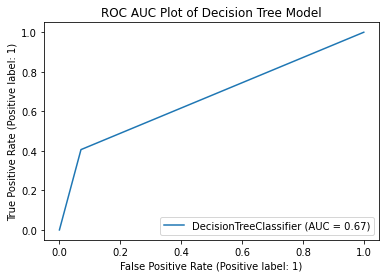

In [30]:
plot_roc_curve(dtc, X_test,Y_test)
plt.title('ROC AUC Plot of Decision Tree Model')
plt.show()

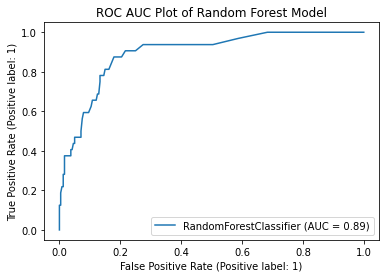

In [31]:
plot_roc_curve(model, X_test,Y_test)
plt.title('ROC AUC Plot of Random Forest Model')
plt.show()

Comparing both the roc auc curve, RandomForestClassifier shows the maximum potential

## Building predictive model using RandomForestClassifier

In [32]:
# Building a predictive System
input_data = (7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8)

#changing the input data into a numpy array
wine=np.asarray(input_data)

# reshape the data as we are predicting the lebel for only one instance
wine_reshaped=wine.reshape(1,-1)

rfc_prediction=model.predict(wine_reshaped)
print(rfc_prediction)
if rfc_prediction[0]==1:
    print("Good Quality Wine")
else:
    print("Poor Quality Wine")

[1]
Good Quality Wine


In [33]:
input_data2 = (7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4)

#changing the input data into a numpy array
wine=np.asarray(input_data2)

# reshape the data as we are predicting the lebel for only one instance
wine_reshaped=wine.reshape(1,-1)

rfc_prediction=model.predict(wine_reshaped)
print(rfc_prediction)
if rfc_prediction[0]==1:
    print("Good Quality Wine")
else:
    print("Poor Quality Wine")

[0]
Poor Quality Wine


Hence, checked and confirmed that the model is working well

### Saving the model

In [34]:
import joblib
joblib.dump(model,"Red Wine Quality Prediction.pkl")

['Red Wine Quality Prediction.pkl']